In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('heart.csv')

In [70]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [72]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

In [73]:
data.drop_duplicates(inplace=True)

In [74]:
faulty_indices = data[(data['ca'] == 4) | (data['thal'] == 0)].index
data.drop(faulty_indices, inplace = True)

In [75]:
data["sex"].value_counts()

sex
1    201
0     95
Name: count, dtype: int64

In [76]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [77]:
data.shape

(296, 14)

In [78]:
data["target"].value_counts()

target
1    160
0    136
Name: count, dtype: int64

In [79]:
data["ca"].value_counts()

ca
0    173
1     65
2     38
3     20
Name: count, dtype: int64

In [80]:
data["cp"].value_counts()

cp
0    141
2     83
1     49
3     23
Name: count, dtype: int64

In [81]:
data["thal"].value_counts()

thal
2    163
3    115
1     18
Name: count, dtype: int64

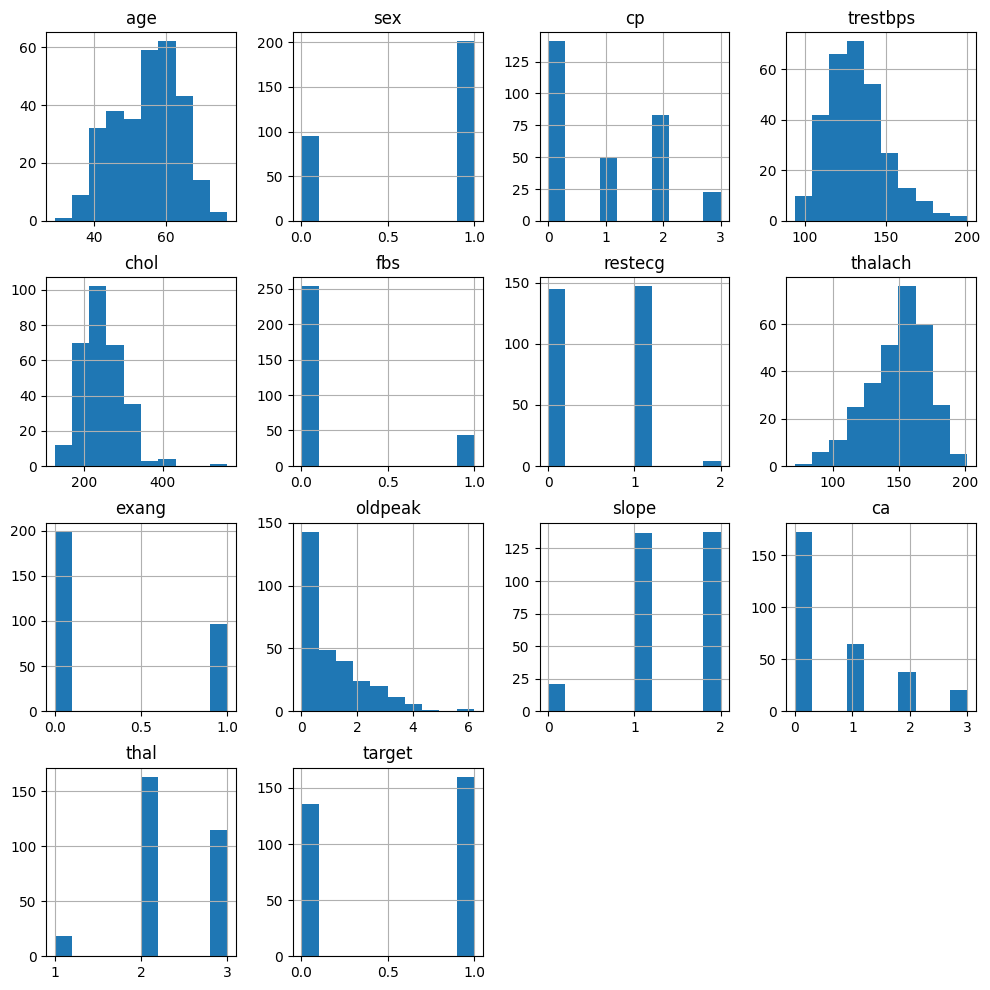

In [82]:
data.hist(figsize = (12, 12))
plt.show()

In [83]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,296.000000,296.000000,296.000000,296.00000,296.000000,296.00000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,54.523649,0.679054,0.959459,131.60473,247.155405,0.14527,0.523649,149.560811,0.327703,1.059122,1.395270,0.679054,2.327703,0.540541
std,9.059471,0.467631,1.034184,17.72662,51.977011,0.35297,0.526692,22.970792,0.470171,1.166474,0.618235,0.939726,0.585743,0.499198
min,29.000000,0.000000,0.000000,94.00000,126.000000,0.00000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,0.000000,120.00000,211.000000,0.00000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.00000,242.500000,0.00000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.00000,275.250000,0.00000,1.000000,166.000000,1.000000,1.650000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.00000,564.000000,1.00000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


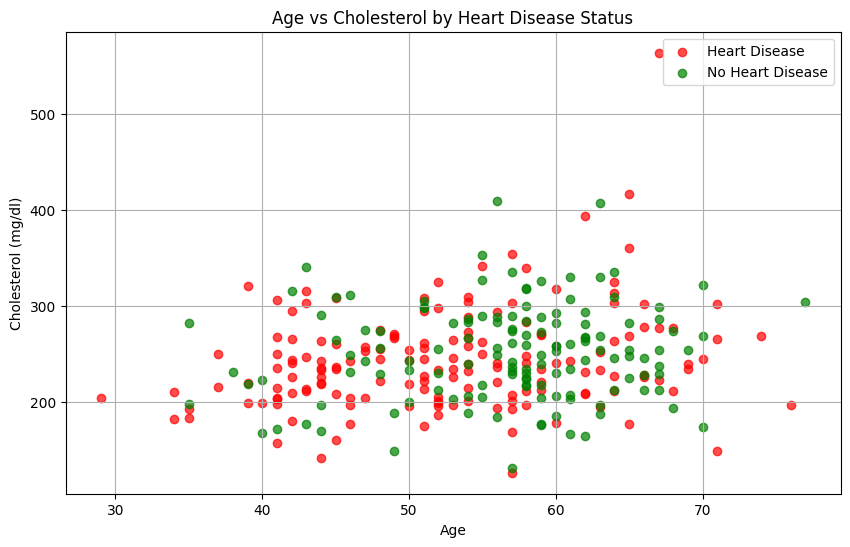

In [84]:
age_with_disease = data[data['target'] == 1]['age']
chol_with_disease = data[data['target'] == 1]['chol']
age_without_disease = data[data['target'] == 0]['age']
chol_without_disease = data[data['target'] == 0]['chol']

# Plot the graph
plt.figure(figsize=(10, 6))

plt.scatter(age_with_disease, chol_with_disease, color='red', marker='o', label='Heart Disease', alpha=0.7)
plt.scatter(age_without_disease, chol_without_disease, color='green', marker='o', label='No Heart Disease', alpha=0.7)

# Labeling and styling
plt.title('Age vs Cholesterol by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Cholesterol (mg/dl)')
plt.legend()
plt.grid(True)
plt.show()


* The graph suggests that while there may be some association between age, cholesterol levels, and heart disease status, the relationship is not entirely straightforward.
* Elevated cholesterol levels are observed among both patients with and without heart disease,    indicating that cholesterol alone may not be a definitive predictor of heart disease.
* Other factors, such as age, sex, and additional health parameters, likely contribute to the overall risk of heart disease in individuals

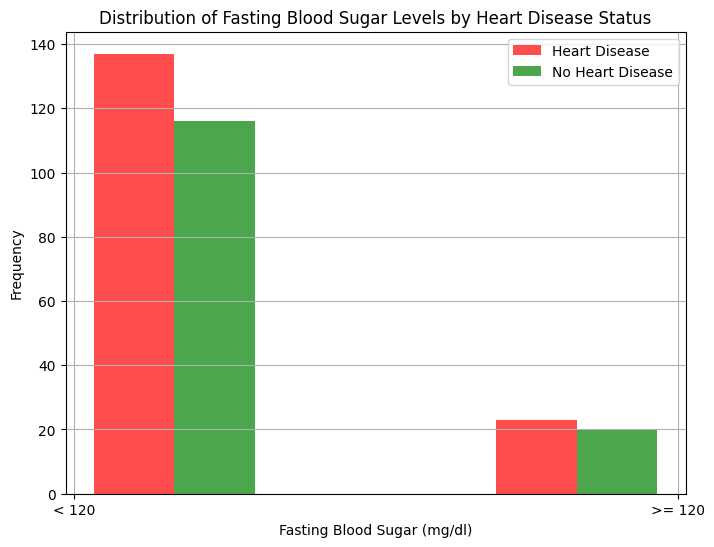

In [85]:
# Separate data for patients with and without heart disease
fbs_with_disease = data[data['target'] == 1]['fbs']
fbs_without_disease = data[data['target'] == 0]['fbs']

# Plot the graph
plt.figure(figsize=(8, 6))
plt.hist([fbs_with_disease, fbs_without_disease], color=['red', 'green'], alpha=0.7, bins=3, label=['Heart Disease', 'No Heart Disease'])

# Labeling and styling
plt.title('Distribution of Fasting Blood Sugar Levels by Heart Disease Status')
plt.xlabel('Fasting Blood Sugar (mg/dl)')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['< 120', '>= 120'])
plt.legend()
plt.grid(True)
plt.show()


Individuals with higher fasting blood sugar levels may have an increased risk of developing heart disease

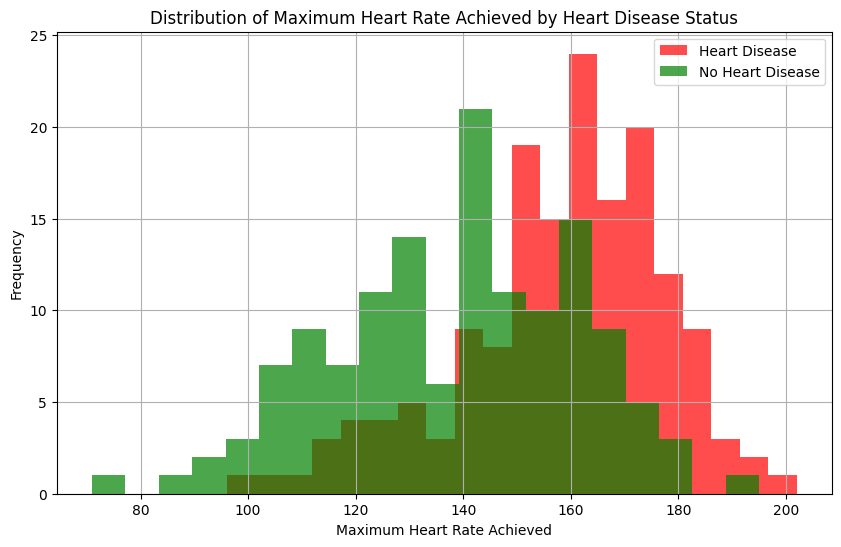

In [86]:
thalach_with_disease = data[data['target'] == 1]['thalach']
thalach_without_disease = data[data['target'] == 0]['thalach']

plt.figure(figsize=(10, 6))

plt.hist(thalach_with_disease, color='red', alpha=0.7, bins=20, label='Heart Disease')
plt.hist(thalach_without_disease, color='green', alpha=0.7, bins=20, label='No Heart Disease')

# Labeling and styling
plt.title('Distribution of Maximum Heart Rate Achieved by Heart Disease Status')
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


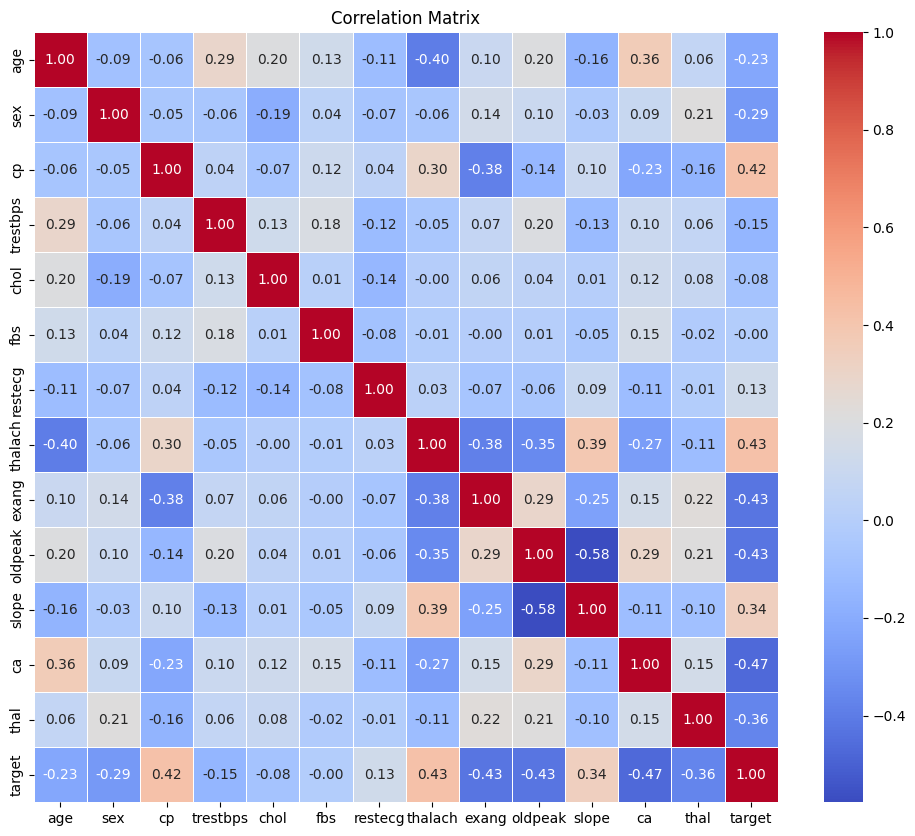

In [87]:
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Splitting dependent and independent variables

In [88]:
X = data.drop("target",axis = 1)

In [89]:
y = data["target"]

In [90]:
X.shape

(296, 13)

In [91]:
y.shape

(296,)

## Splitting into train and test

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42)

In [93]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
71,61,1,0,140,207,0,0,138,1,1.9,2,1,3
19,58,1,2,140,211,1,0,165,0,0.0,2,0,2
331,63,0,0,108,269,0,1,169,1,1.8,1,2,2
337,54,1,2,125,273,0,0,152,0,0.5,0,1,2
260,44,1,2,120,226,0,1,169,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,43,1,0,110,211,0,1,161,0,0.0,2,0,3
80,50,1,2,140,233,0,1,163,0,0.6,1,1,3
129,57,1,0,140,192,0,1,148,0,0.4,1,0,1
549,68,1,2,118,277,0,1,151,0,1.0,2,1,3


In [94]:
y_train

71     0
19     1
331    0
337    1
260    1
      ..
270    1
80     0
129    1
549    1
123    1
Name: target, Length: 236, dtype: int64

## Scaling or Standardisation or Normalisation

In [95]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [96]:
X_train = sc.fit_transform(X_train)

In [97]:
X_train

array([[ 0.67,  0.72, -0.89, ...,  0.98,  0.35,  1.13],
       [ 0.33,  0.72,  1.1 , ...,  0.98, -0.72, -0.59],
       [ 0.89, -1.4 , -0.89, ..., -0.64,  1.41, -0.59],
       ...,
       [ 0.21,  0.72, -0.89, ..., -0.64, -0.72, -2.32],
       [ 1.46,  0.72,  1.1 , ...,  0.98,  0.35,  1.13],
       [ 1.12, -1.4 ,  1.1 , ...,  0.98,  0.35, -0.59]])

In [98]:
X_test = sc.transform(X_test)

## Building the Neural Network 

In [99]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [146]:
nn_model = Sequential()

# Input layer
nn_model.add(Dense(units=32, activation='relu', input_shape=(X_train.shape[1],)))

# Hidden layers
nn_model.add(Dense(units=64, activation='relu'))
nn_model.add(Dropout(0.2))  # Adding dropout regularization to prevent overfitting
nn_model.add(Dense(units=32, activation='relu'))
# Output layer
nn_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
nn_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
nn_model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,673 (18.25 KB)

 Trainable params: 4,673 (18.25 KB)

 Non-trainable params: 0 (0.00 B)

### Training the model

In [147]:
history = nn_model.fit(X_train, y_train, batch_size = 16, epochs = 25, validation_data = (X_test, y_test))

Epoch 1/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5334 - loss: 0.7020 - val_accuracy: 0.7833 - val_loss: 0.6335
Epoch 2/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7557 - loss: 0.6149 - val_accuracy: 0.7667 - val_loss: 0.5634
Epoch 3/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7737 - loss: 0.5525 - val_accuracy: 0.7833 - val_loss: 0.4875
Epoch 4/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8503 - loss: 0.4694 - val_accuracy: 0.8167 - val_loss: 0.4195
Epoch 5/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8330 - loss: 0.4569 - val_accuracy: 0.8333 - val_loss: 0.3713
Epoch 6/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8543 - loss: 0.3797 - val_accuracy: 0.8667 - val_loss: 0.3435
Epoch 7/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8760 - loss: 0.3572 - val_accuracy: 0.8833 - val_loss: 0.3293
Epoch 8/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8591 - loss: 0.3390 - val_accuracy: 0.8833 - val_loss

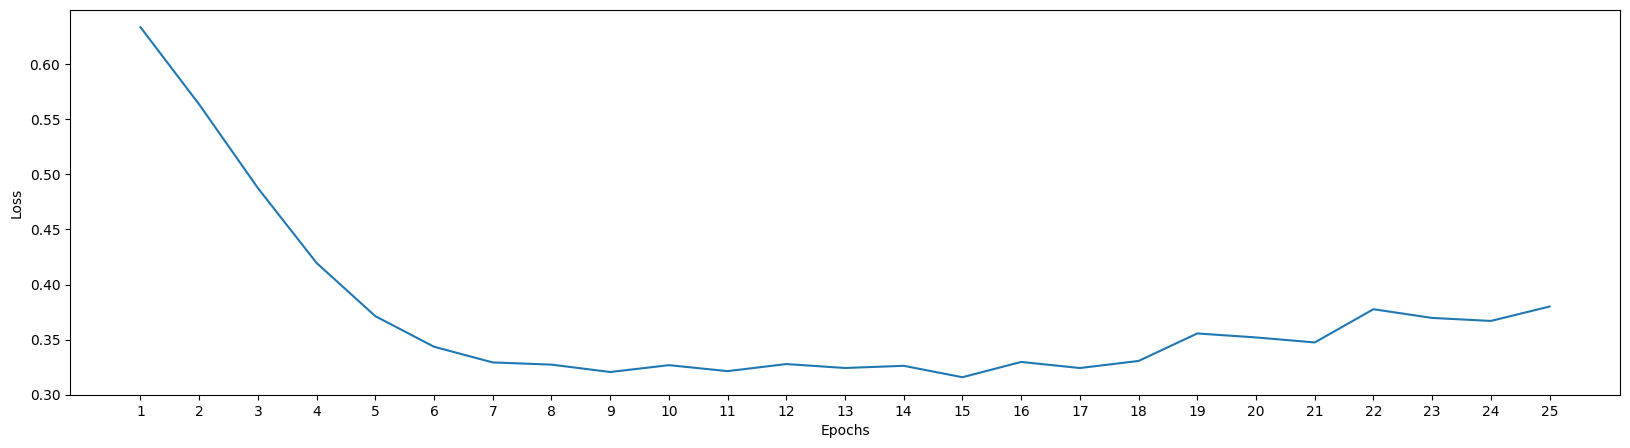

In [148]:
plt.figure(figsize=(20,5))
plt.plot(range(1,len(history.history["val_loss"])+1), history.history["val_loss"])
plt.xticks(range(1,len(history.history["val_loss"])+1))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

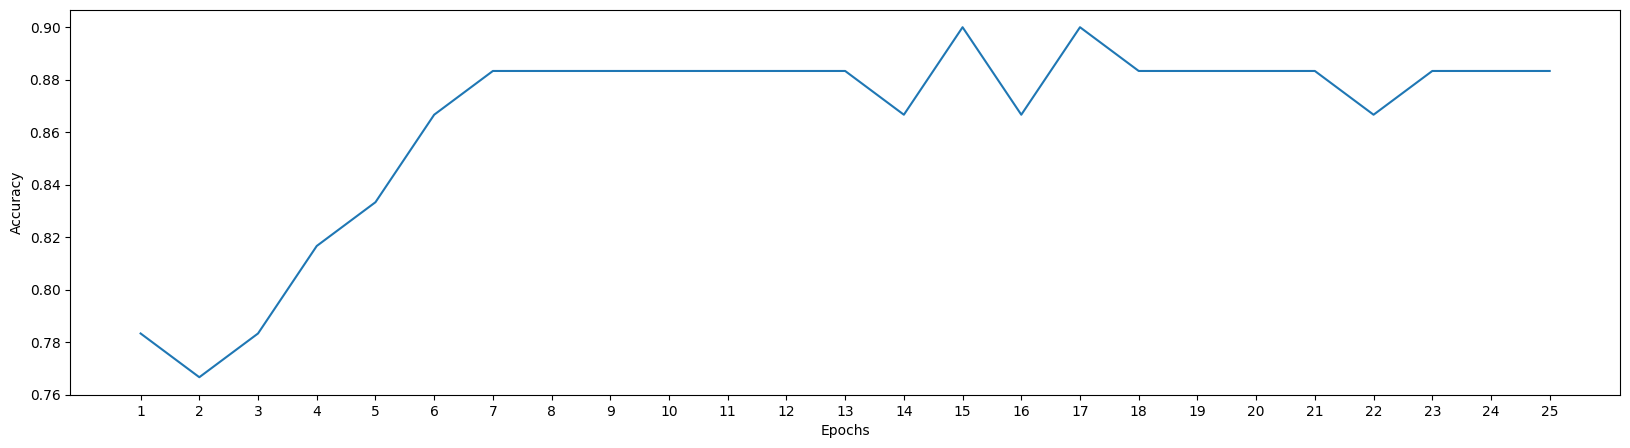

In [149]:
plt.figure(figsize=(20,5))
plt.plot(range(1,len(history.history["val_accuracy"])+1), history.history["val_accuracy"])
plt.xticks(range(1,len(history.history["val_accuracy"])+1))
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

### Evaluating the model

In [150]:
X_test.shape

(60, 13)

In [151]:
y_pred = nn_model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [152]:
y_pred

array([[1.  ],
       [0.01],
       [0.9 ],
       [0.  ],
       [0.13],
       [0.  ],
       [0.9 ],
       [0.98],
       [0.91],
       [0.91],
       [0.99],
       [0.  ],
       [1.  ],
       [0.  ],
       [0.95],
       [1.  ],
       [0.48],
       [0.82],
       [0.01],
       [0.91],
       [0.  ],
       [1.  ],
       [0.32],
       [0.04],
       [0.12],
       [0.97],
       [0.01],
       [1.  ],
       [1.  ],
       [0.12],
       [0.99],
       [0.92],
       [1.  ],
       [0.69],
       [0.98],
       [0.99],
       [0.76],
       [0.94],
       [0.66],
       [0.9 ],
       [0.84],
       [0.01],
       [1.  ],
       [0.  ],
       [0.2 ],
       [0.  ],
       [0.98],
       [0.99],
       [0.  ],
       [0.98],
       [0.89],
       [0.  ],
       [0.02],
       [1.  ],
       [0.99],
       [0.97],
       [1.  ],
       [0.98],
       [0.99],
       [0.92]], dtype=float32)

In [153]:
y_pred = [round(pred[0]) for pred in y_pred]

In [154]:
y_pred

[1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [155]:
from sklearn.metrics import accuracy_score,classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8833333333333333


In [156]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.79      0.84        24
           1       0.87      0.94      0.91        36

    accuracy                           0.88        60
   macro avg       0.89      0.87      0.88        60
weighted avg       0.88      0.88      0.88        60



### Real time prediction

In [157]:
new_data = X.iloc[43:44,:]

In [158]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
47,66,0,0,178,228,1,1,165,1,1.0,1,2,3


In [159]:
np.set_printoptions(precision = 2, suppress = True)

In [160]:
new_data.values

array([[ 66.,   0.,   0., 178., 228.,   1.,   1., 165.,   1.,   1.,   1.,
          2.,   3.]])

In [161]:
new_data = sc.transform(new_data)
y_pred = nn_model.predict(new_data)
predicted_class = round(y_pred[0][0]) 
print(predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
0


In [162]:
row_values = [66, 0, 0, 178, 228, 1, 1, 165, 1, 1, 1, 2,3,0]

# Create a boolean mask to filter rows with the specified values
mask = (data == row_values).all(axis=1)

# Use the mask to locate the rows
matching_rows = data[mask]

print("Rows with the specified values:")
print(matching_rows)

Rows with the specified values:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
47   66    0   0       178   228    1        1      165      1      1.0   

    slope  ca  thal  target  
47      1   2     3       0  


In [163]:
nn_model.save("heart_disease_model.h5")

In [164]:
import joblib

# Save the scaler
joblib.dump(sc, "scaler.pkl")


['scaler.pkl']